In [1]:
import pandas as pd
import numpy as np

In [8]:
table1 = pd.read_csv('D:/ClinVar/CorrSIFT.csv', sep=';', index_col=0)
table2 = pd.read_csv('D:/ClinVar/CorrPoly.Phen2.csv', sep=';', index_col=0)
table3 = pd.read_csv('D:/ClinVar/CorrPyMissense.csv', sep=';', index_col=0)

In [9]:
correlation_12 = table1.corrwith(table2)
correlation_23 = table2.corrwith(table3)
correlation_13 = table1.corrwith(table3)

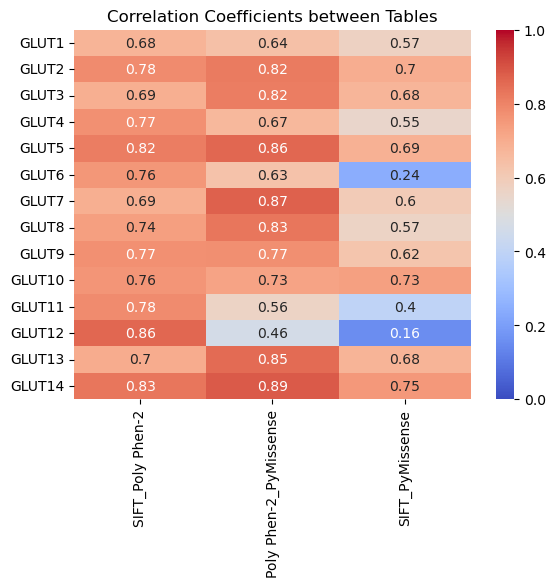

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe from correlation coefficients
correlation_df = pd.DataFrame({'SIFT_Poly Phen-2': correlation_12, 'Poly Phen-2_PyMissense': correlation_23, 'SIFT_PyMissense': correlation_13})
correlation_df = correlation_df.astype(float)
# Plot heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Coefficients between Tables')
plt.show()

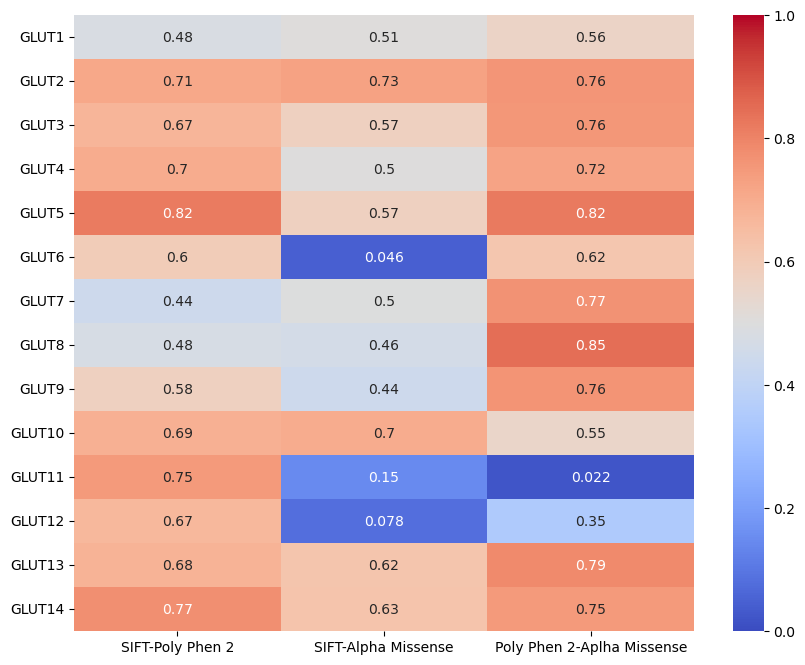

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your csv files
df1 = pd.read_csv('D:/ClinVar/CorrSIFT.csv', sep=';', index_col=0)
df2 = pd.read_csv('D:/ClinVar/CorrPoly.Phen2.csv', sep=';', index_col=0)
df3 = pd.read_csv('D:/ClinVar/CorrPyMissense.csv', sep=';', index_col=0)

# Calculate the Spearman rank correlation coefficients
corr1_2 = df1.corrwith(df2, method='spearman')
corr1_3 = df1.corrwith(df3, method='spearman')
corr2_3 = df2.corrwith(df3, method='spearman')

# Combine the correlation coefficients into a single DataFrame
df_corr = pd.DataFrame({'SIFT-Poly Phen 2': corr1_2, 'SIFT-Alpha Missense': corr1_3, 'Poly Phen 2-Aplha Missense': corr2_3})

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.show()

In [27]:
import os

# Load your csv files
df1 = pd.read_csv('D:/ClinVar/CorrSIFT.csv', sep=';', index_col=0)
df2 = pd.read_csv('D:/ClinVar/CorrPoly.Phen2.csv', sep=';', index_col=0)
df3 = pd.read_csv('D:/ClinVar/CorrPyMissense.csv', sep=';', index_col=0)

df1_rounded = df1.round(2)
df2_rounded = df2.round(2)
df3_rounded = df3.round(2)


# Get the directory of the original files
dir_path = os.path.dirname(os.path.realpath('D:/ClinVar/CorrSIFT.csv'))

# Save the rounded DataFrames to new .csv files in the original directory
df1_rounded.to_csv(os.path.join(dir_path, 'CorrSIFT_rounded.csv'), index=False)
df2_rounded.to_csv(os.path.join(dir_path, 'CorrPoly_rounded.csv'), index=False)
df3_rounded.to_csv(os.path.join(dir_path, 'CorrPyMissense_rounded.csv'), index=False)



In [16]:
import pandas as pd
from sklearn.metrics import confusion_matrix, matthews_corrcoef, f1_score, precision_score, recall_score


In [17]:
df = pd.read_csv('D:/ClinVar/AnalysisofPrediction.csv', sep=';')

In [23]:
threshold = 0.5
df['Significance.binary'] = (df['Significance.numbered'] >= threshold).astype(int)


In [24]:
df['SIFT'] = 1 - df['SIFT']

In [25]:
py_missense_threshold = 0.5
df['PyMissense'] = df['PyMissense'] >= py_missense_threshold

In [28]:
y_true = df['Significance.binary']
y_pred_sift = df['SIFT']
y_pred_polyphen2 = df['Poly.Phen2']
y_pred_py_missense = df['PyMissense']

In [29]:
ppv_sift = precision_score(y_true, y_pred_sift)
tpr_sift = recall_score(y_true, y_pred_sift)
mcc_sift = matthews_corrcoef(y_true, y_pred_sift)
f1_sift = f1_score(y_true, y_pred_sift)

ValueError: Classification metrics can't handle a mix of binary and continuous targets